# Fig 2.09 Numerical Simulation of a metabolic network

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays


using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
exprel(x) = ifelse(x≈zero(x), one(x), x / expm1(x))

exprel (generic function with 1 method)

In [3]:
function model!(du, u, p, t)
	@unpack a, b, c, d = u
	v1 = 2.0a
	v2 = 2.5*a*b
	v3 = 3.0c
	v4 = 3.0d

	du.a = 3.0 - v1 - v2
	du.b = v1 - v2
	du.c = v2 - v3
	du.d = v2 - v4
	return du
end

model! (generic function with 1 method)

In [4]:
u0 = LVector(a=0.0, b=0.0, c=0.0, d=0.0)
tend = 10.0
sol = solve(ODEProblem(model!, u0, tend));

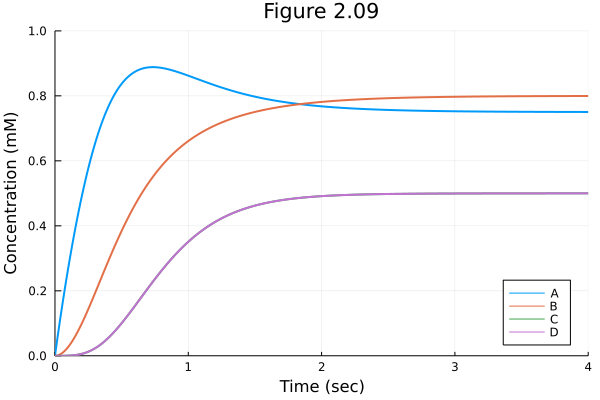

In [5]:
plot(sol, xlims=(0.0, 4.0), ylims=(0.0, 1.0), 
     xlabel="Time (sec)", ylabel="Concentration (mM)", title="Figure 2.09",
     label=["A" "B" "C" "D"], legend=:bottomright)